# Marketing Analysis

**Overview**:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="darkgrid")

# Error handling
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Import dataset
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Data Analysis

In [21]:
# Check the shape
df.shape


(45211, 17)

- Presence of `45211` rows and `17` columns

In [22]:
# Check for discripancies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- No missing values

In [23]:
# Check for statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [38]:
# Check for unique values in job
def check_unique(column):
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    
print("Unique values in each categorical columns")
print("--------------------------------------------------")
check_unique('job')
# Check for unique values in marital
check_unique('marital')
# Check for unique values in education
check_unique('education')
# Check for unique values in default
check_unique('default')
# Check for unique values in housing
check_unique('housing')
# Check for unique values in loan
check_unique('loan')
# Check for unique values in contact
check_unique('contact')
# Check for unique values in month
check_unique('month')
# Check for unique values in poutcome
check_unique('poutcome')


Unique values in each categorical columns
--------------------------------------------------
Unique values in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in 'marital': ['married' 'single' 'divorced']
Unique values in 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in 'default': ['no' 'yes']
Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['unknown' 'cellular' 'telephone']
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome': ['unknown' 'failure' 'other' 'success']


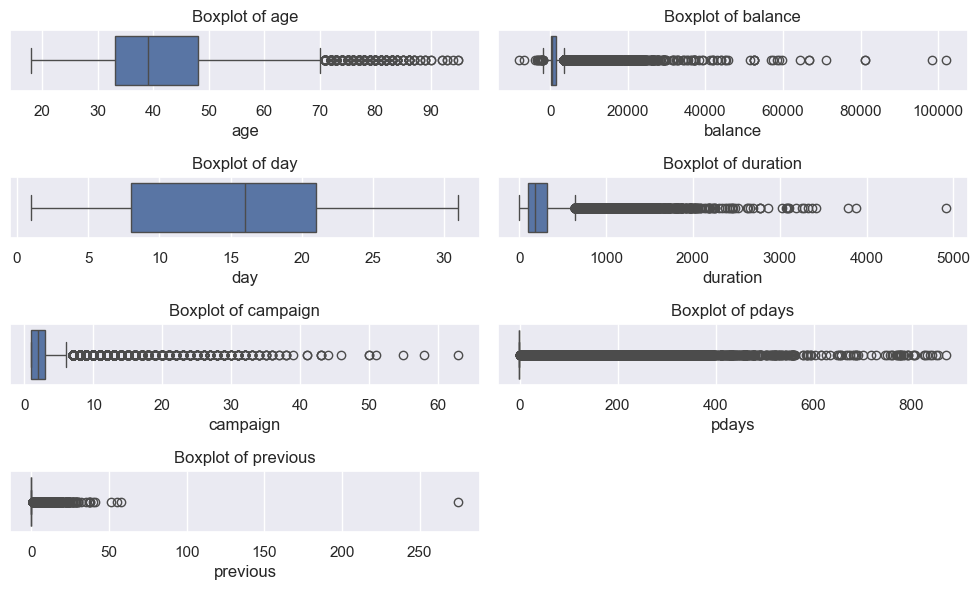

In [35]:
# Check for outliers in numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
fig, ax = plt.subplots(len(numerical_columns), 2, figsize=(10, 10))
ax = ax.flatten()
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=ax[i])
    ax[i].set_title(f'Boxplot of {column}')

    # remove unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show();

- Precence of `outliers` in `balance`, `duration`, `campaign`, and `previous` columns

## Visualizations
### Univariate Analysis

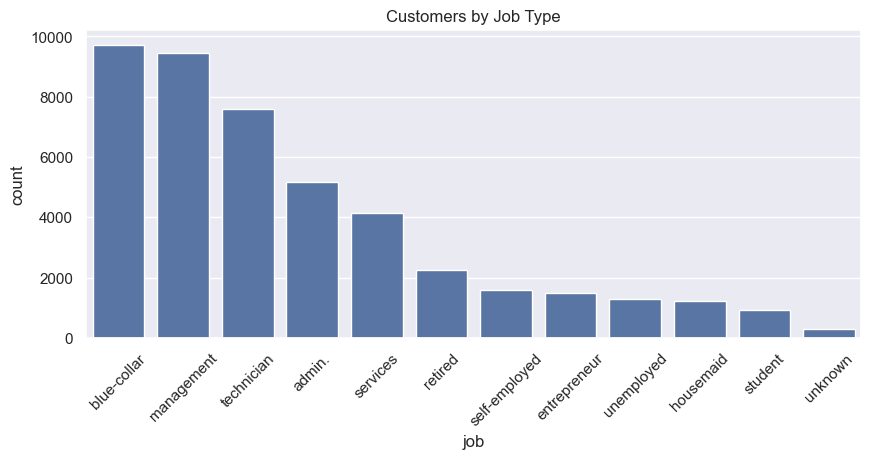

In [60]:
# Visualize job distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Customers by Job Type')
plt.xticks(rotation=45)
plt.show();

- Customers working in `blue-collar` jobs account for the highest number of deposit subscribers, followed by `management`, and `technician` respectively

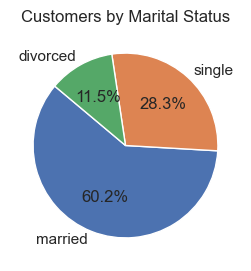

In [58]:
# pie chart for marital status
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(6, 3))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customers by Marital Status')
plt.show();

- Married customers account for 60.2% term deposit subscribers

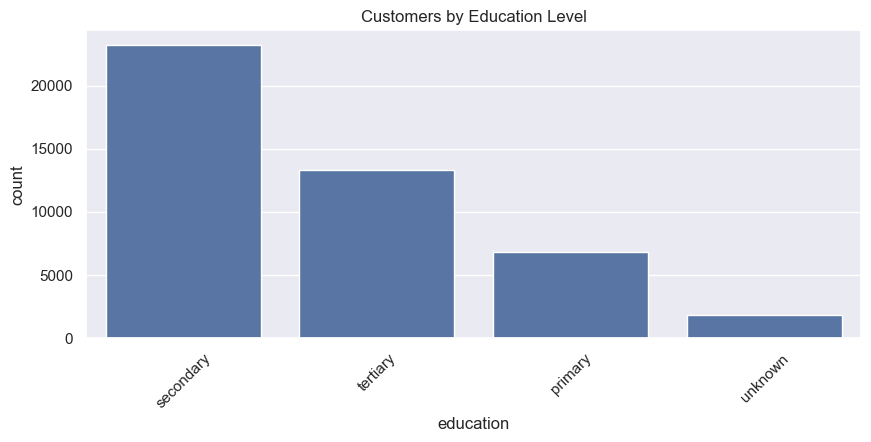

In [61]:
# Visualize education
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Customers by Education Level')
plt.xticks(rotation=45)
plt.show();

- Majority of customers have `secondary` education

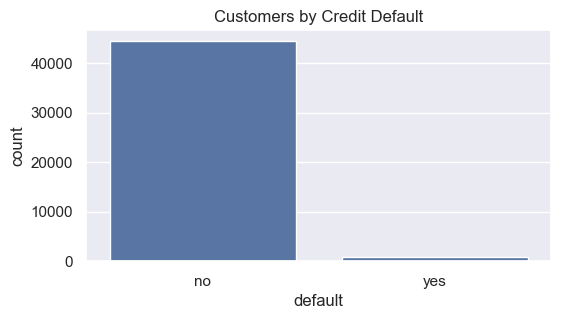

In [62]:
# Visualiza default
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='default', order=df['default'].value_counts().index)
plt.title('Customers by Credit Default')
plt.show();

- Majority of customers have not defaulted

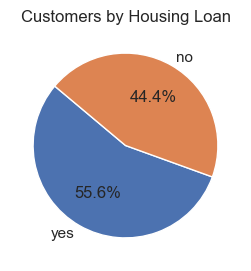

In [63]:
# Housing pie chart
housing_counts = df['housing'].value_counts()
plt.figure(figsize=(6, 3))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customers by Housing Loan')
plt.show();

- `55.6%` customers have a `housing` load while `44.4%` do not have

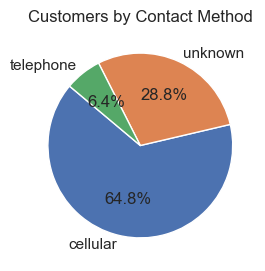

In [64]:
# Visualize contact
contact_counts = df['contact'].value_counts()
plt.figure(figsize=(6, 3))
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customers by Contact Method')
plt.show();

- `64.8%` customers were contacted via `cellular` phones, while `6.4%` were contacted via `telephone`

### Bivariate Analysis

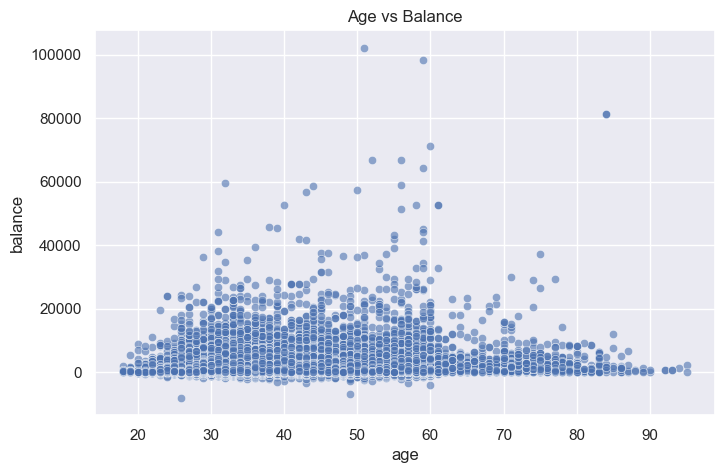

In [69]:
# scatter plot for age vs balance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='balance', alpha=0.6)
plt.title('Age vs Balance')
plt.show();

- Majority of customers of all ages have a bank balance of between `0` and `20000`

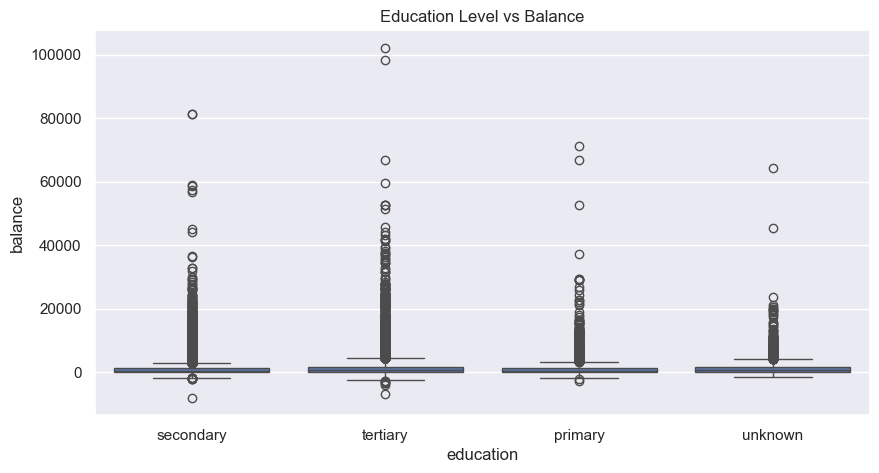

In [70]:
# Education vs balance
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='education', y='balance', order=df['education'].value_counts().index)
plt.title('Education Level vs Balance')
plt.show();

- Majority of customers in all education levels have a bank balance of between `0` and approximately `40000`

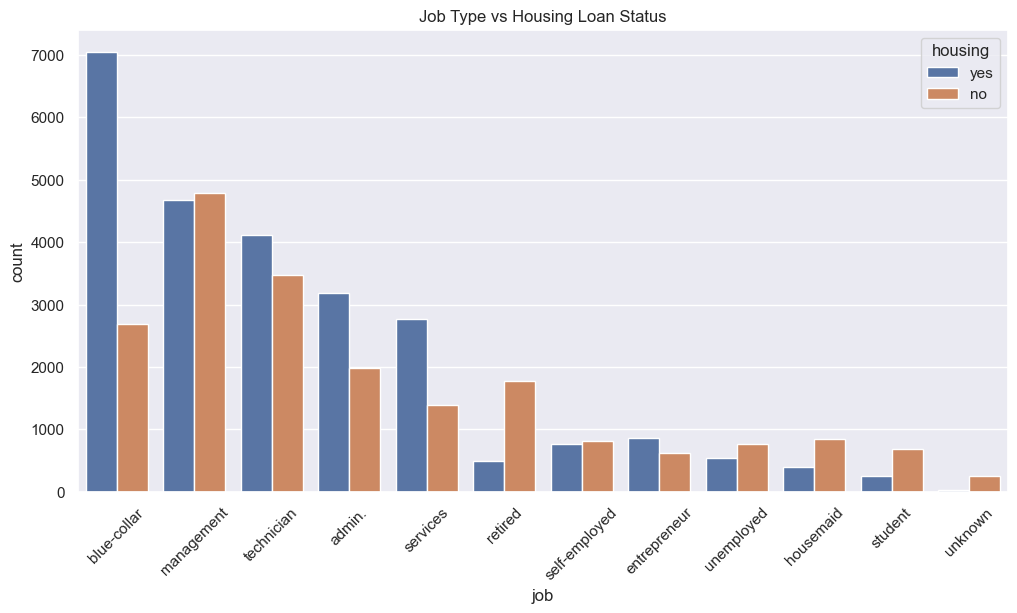

In [72]:
# Housing vs Job
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='housing', order=df['job'].value_counts().index)
plt.title('Job Type vs Housing Loan Status')
plt.xticks(rotation=45)
plt.show();

- All job categories have `housing` loan except `unknown` category

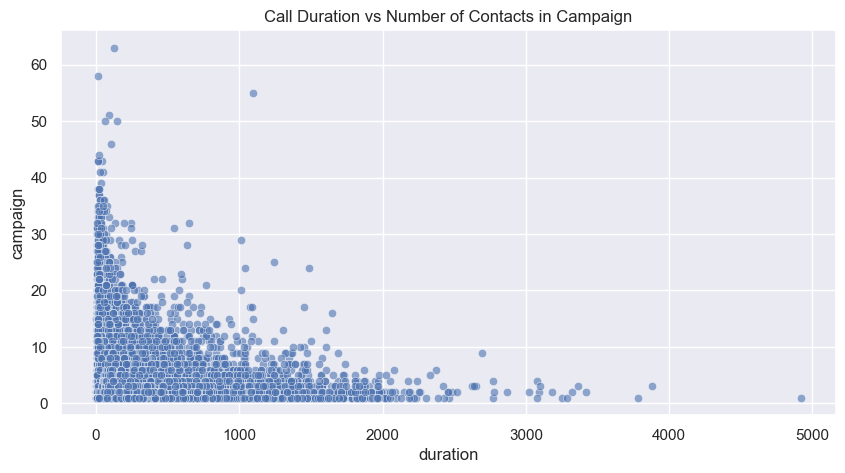

In [73]:
# Duration vs campaign
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='duration', y='campaign', alpha=0.6)
plt.title('Call Duration vs Number of Contacts in Campaign')
plt.show();

- There is a `negative` correlation between `campaign` and `duration`

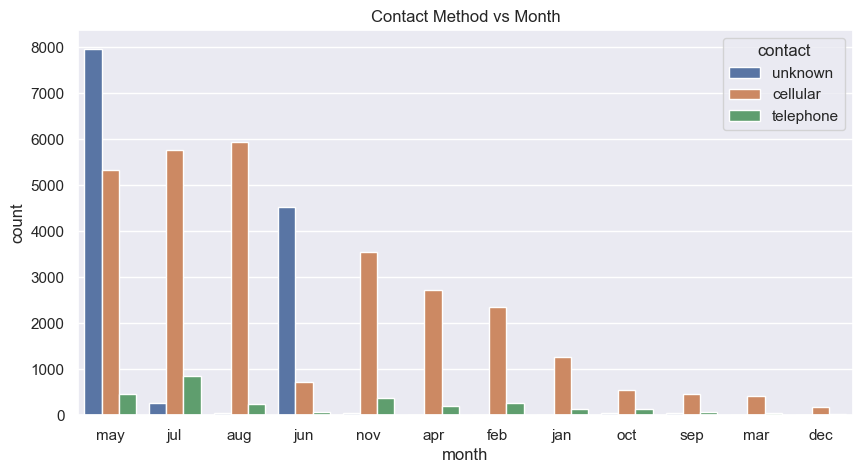

In [74]:
# Contact vs month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='month', hue='contact', order=df['month'].value_counts().index)
plt.title('Contact Method vs Month')
plt.show();

- Months of `May` and `June` had customers contacted via `unknown` method
- `Cellular` contact method has proved to be the most common across all months

### Key Findings
1. `64.8%` of customers were contacted via `cellular` method
2. Customers in `blue-collar` jobs took the highest `housing` loans
3. Majority of customers in `secondary`, `tertiary`, `primary`, and `unknown` education levels have a bank balance of between `0` and approximately `40000`
4. Majority of customers of all ages have a bank balance of between `0` and `20000`
5. Majority of customers rarely `default` their credit loans